In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train.shape

(50000,)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

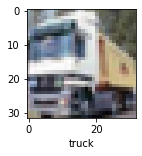

In [10]:
plot_sample(x_train,y_train,1)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# y_train_categorical = keras.utils.to_categorical(
#     y_train, num_classes=10, dtype='float32'
# )
# y_test_categorical = keras.utils.to_categorical(
#     y_test, num_classes=10, dtype='float32'
# )

# y_train_categorical[0:5]

In [13]:
ann = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu',kernel_initializer='he_uniform'),
    layers.Dense(1000,activation="relu",kernel_initializer='he_uniform'),    
    layers.Dense(10,kernel_initializer='glorot_uniform', activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7961 - accuracy: 0.3602
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5991 - accuracy: 0.4353
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5168 - accuracy: 0.4671
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4548 - accuracy: 0.4883
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4017 - accuracy: 0.5056
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3569 - accuracy: 0.5232
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3174 - accuracy: 0.5385
Epoch 8/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2788 - accuracy: 0.5520
Epoch 9/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2432 - accuracy: 0.5630: 2s - los - ETA: 1s - l - ETA: 0s - loss: 1.2
Epoch 10/15
1563/1563 [=============

In [15]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3197 - accuracy: 0.5382


[1.3196547031402588, 0.5382000207901001]

In [24]:
classes[np.argmax(ann.predict(x_test)[5])]

'frog'

In [25]:
classes[y_test[5]]

'frog'

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.68      0.59      1000
           1       0.68      0.62      0.65      1000
           2       0.43      0.43      0.43      1000
           3       0.42      0.34      0.37      1000
           4       0.43      0.55      0.48      1000
           5       0.53      0.33      0.41      1000
           6       0.61      0.56      0.58      1000
           7       0.66      0.54      0.59      1000
           8       0.57      0.75      0.65      1000
           9       0.59      0.56      0.58      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



In [32]:
# Use CNN

In [35]:
cnn = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32, 32, 3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(256,activation='relu',kernel_initializer='he_uniform'),
    layers.Dense(10,kernel_initializer='glorot_uniform', activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 10s 3ms/step - loss: 1.4368 - accuracy: 0.4827
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0733 - accuracy: 0.6205
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9068 - accuracy: 0.6803
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7836 - accuracy: 0.7245
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6666 - accuracy: 0.7674
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5659 - accuracy: 0.8005
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4677 - accuracy: 0.8381
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3865 - accuracy: 0.8641
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3053 - accuracy: 0.8924
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.24

In [36]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8545 - accuracy: 0.6814


[1.8544833660125732, 0.6814000010490417]

In [40]:
classes[np.argmax(cnn.predict(x_test)[50])]

'truck'

In [41]:
classes[y_test[50]]

'truck'

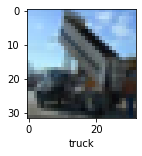

In [42]:
plot_sample(x_test,y_test,50)

In [43]:
y_pred_cnn = cnn.predict(x_test)
y_pred_cnn[:5]

array([[4.00965696e-08, 2.25505445e-07, 1.08691193e-05, 9.99282777e-01,
        4.45747078e-10, 4.00841818e-04, 3.05333757e-04, 2.36412867e-09,
        1.60217564e-08, 2.96006997e-10],
       [5.32647704e-08, 9.90628421e-01, 6.14166702e-16, 4.14936284e-20,
        1.21985398e-19, 2.54132599e-20, 2.55503199e-20, 1.37410403e-14,
        9.37152654e-03, 2.30063169e-12],
       [7.48729408e-01, 4.91605736e-02, 2.49996199e-04, 2.20124246e-04,
        7.25081190e-05, 1.03059765e-05, 5.76340859e-08, 3.52624280e-04,
        1.97399482e-01, 3.80492606e-03],
       [9.95506525e-01, 1.12199096e-03, 4.10271059e-05, 8.63125627e-10,
        2.81433193e-11, 4.98809652e-13, 1.96315268e-13, 4.85992757e-08,
        3.32008954e-03, 1.03290513e-05],
       [1.00572470e-19, 1.68647512e-14, 8.26367852e-07, 9.44223359e-07,
        9.99492526e-01, 5.28648968e-07, 5.05207106e-04, 8.90170747e-18,
        8.12192043e-14, 2.32644322e-16]], dtype=float32)

In [44]:
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

In [47]:
classes[y_pred_classes_cnn[50]]

'truck'

In [52]:
y_test[45:50]

array([9, 3, 9, 7, 6], dtype=uint8)

In [53]:
y_pred_classes_cnn[45:50]

[9, 5, 7, 7, 4]

In [54]:
y_pred_classes[45:50]

[9, 5, 8, 4, 4]

In [55]:
print("Classification Report: \n", classification_report(y_test,y_pred_classes_cnn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.83      0.76      0.79      1000
           2       0.59      0.58      0.58      1000
           3       0.46      0.53      0.49      1000
           4       0.69      0.57      0.62      1000
           5       0.54      0.63      0.58      1000
           6       0.78      0.71      0.74      1000
           7       0.71      0.77      0.74      1000
           8       0.79      0.80      0.79      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

